### Boiler Plate Code

In [2]:
import random

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange
from QAP_heuristic import QAP_heuristic
%matplotlib inline

In [3]:
# for managing file opening and closing

def read_integers(filename):
    with open(filename) as f:
        return [int(elem) for elem in f.read().split()]

file_path = '../QAPInstances/tai30b.dat'
file_it = iter(read_integers('../QAPInstances/tai30b.dat'))

# Number of points
n = next(file_it)

# Distance between locations
W = np.array([[next(file_it) for j in range(n)] for i in range(n)])
D = np.array([[next(file_it) for j in range(n)] for i in range(n)])


### Simmulated Annealing 

In [13]:
class SimmulatedAnnealing(QAP_heuristic):
    def __init__(self, w, d, rate, Tmin, T0) -> None:
        super().__init__(w, d)
        self.rate = rate
        self.Tmin = Tmin
        self.T0   = T0

    def solve(self, n_iter):
        
        # initialise a random solution 
        X = np.array(list(range(len(D))))
        np.random.shuffle(X)
        
        # code for simmulated annealing
        perm = X
        curr_cost = self.cost(perm)
        best_cost = curr_cost
        T = self.T0
        perm_history = [perm]
        cost_history = [curr_cost]
        best_cost_history = [best_cost]

        while T > self.Tmin:
            it = 0
            while(it < n_iter):
                new_perm = self.gen_neighbour(perm)
                new_cost = self.cost(new_perm)
                
                ΔE = new_cost - curr_cost
                if (ΔE <= 0) or (np.exp( -ΔE/T ) >= np.random.uniform()):
                    perm = new_perm
                    curr_cost = new_cost
                    
                    if curr_cost < best_cost:
                        best_cost = curr_cost
                        best_perm = perm
                        
                it += 1
                
                perm_history.append(perm)
                cost_history.append(curr_cost)
                best_cost_history.append(best_cost)
        
            T *= self.rate
            
        return best_perm, best_cost, perm_history, cost_history, best_cost_history
    
    @staticmethod
    def gen_neighbour(perm):
    # randomly generates a neighbor through swapping two indices
    # with probability 10%, we shuffle the entire array and return

        new_perm = perm[:]
        # Two random indexes
        i = random.randint(0, len(perm)-1)
        j = random.randint(0, len(perm)-1)

        new_perm[i], new_perm[j] = new_perm[j], new_perm[i]   

        if random.random() < 0.1:
            np.random.shuffle(new_perm)

        return new_perm

### Testing

In [15]:
bests = []
alls  = []
n_epochs = 5

for _ in trange(n_epochs):
    heuristic = SimmulatedAnnealing(W,D,rate=0.99,Tmin=1_000,T0=100_000_000)
    best_perm, best_cost, perm_history, cost_history, best_cost_history = heuristic.solve(10)
    
    bests.append(best_cost_history)
    alls.append(cost_history)

100%|██████████| 5/5 [00:01<00:00,  2.51it/s]


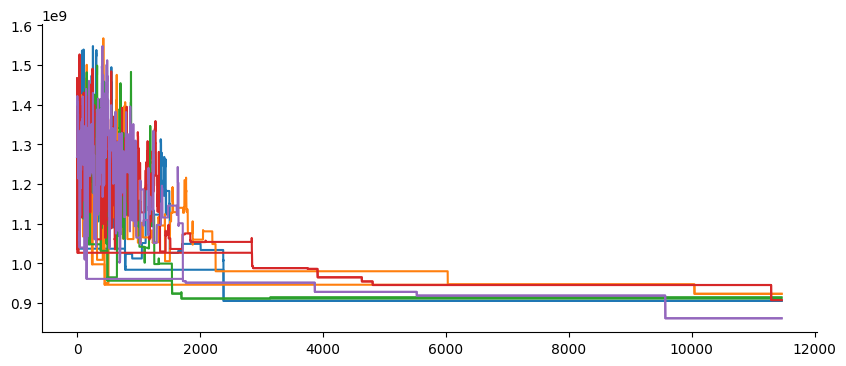

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))


for i, (best, all_) in enumerate(zip(bests, alls)):
    ax.plot(all_, color=f'C{i}')
    ax.plot(best, color=f'C{i}')

sns.despine()
plt.show()